# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [15]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
import statsmodels as sm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [16]:
#1.Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
df = pd.read_excel('Online Retail.xlsx')


df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [19]:
#2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

df1 = df.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)

df1.head()

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [20]:
df1.shape

(541909, 5)

In [21]:
duplicate_rows_df = df1[df1.duplicated()]

print('Number of duplicate rows: ', duplicate_rows_df.shape)

Number of duplicate rows:  (6183, 5)


In [22]:
df1.count()

Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
Country        541909
dtype: int64

In [23]:
df1 = df1.drop_duplicates()

df1.head()

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [24]:
df1.count()

Description    534356
Quantity       535726
InvoiceDate    535726
UnitPrice      535726
Country        535726
dtype: int64

In [25]:
print(df1.isnull().sum())

Description    1370
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64


In [26]:
df1[df1['Description'].isnull()]['UnitPrice'].value_counts()

UnitPrice
0.0    1370
Name: count, dtype: int64

In [27]:
df1 = df1.dropna()

df1.count()

Description    534356
Quantity       534356
InvoiceDate    534356
UnitPrice      534356
Country        534356
dtype: int64

In [28]:
print(df1.isnull().sum())

Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64


In [29]:
#3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.



In [30]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice
count,534356.000000,534356,534356.000000
mean,9.702429,2011-07-04 13:57:02.265231360,4.644569
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:49:00,1.250000
50%,3.000000,2011-07-20 10:08:00,2.080000
75%,10.000000,2011-10-19 10:31:15,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.825292,NaN,97.440329


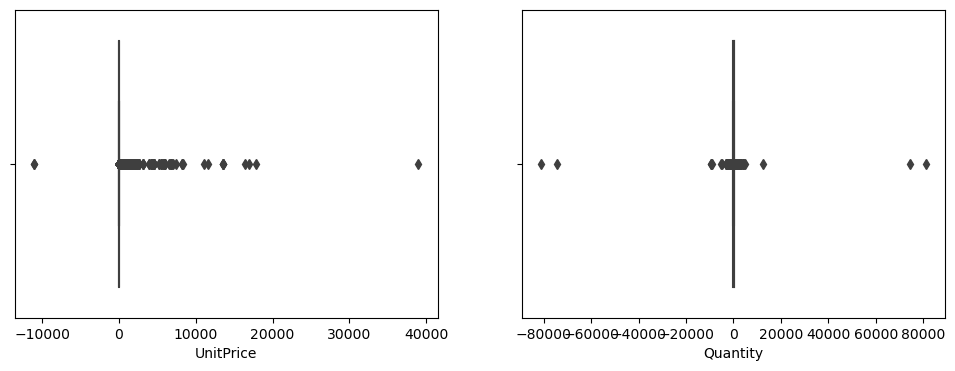

In [31]:
fig, axs = plt.subplots(1,2, figsize=(12,4))


sns.boxplot(x=df1['UnitPrice'],ax=axs[0])
sns.boxplot(x=df1['Quantity'], ax=axs[1])

plt.show()

In [32]:
q1 = df1[['Quantity', 'UnitPrice']].quantile(0.25)
q3 = df1[['Quantity', 'UnitPrice']].quantile(0.75)
iqr = q3 - q1

print(iqr)

df1_no_outliers = df1[~((df1[['Quantity', 'UnitPrice']] < (q1 - 1.5 * iqr)) | (df1[['Quantity', 'UnitPrice']] > (q3 + 1.5 * iqr))).any(axis=1)]

df1_no_outliers.shape

Quantity     9.00
UnitPrice    2.88
dtype: float64


(437650, 5)

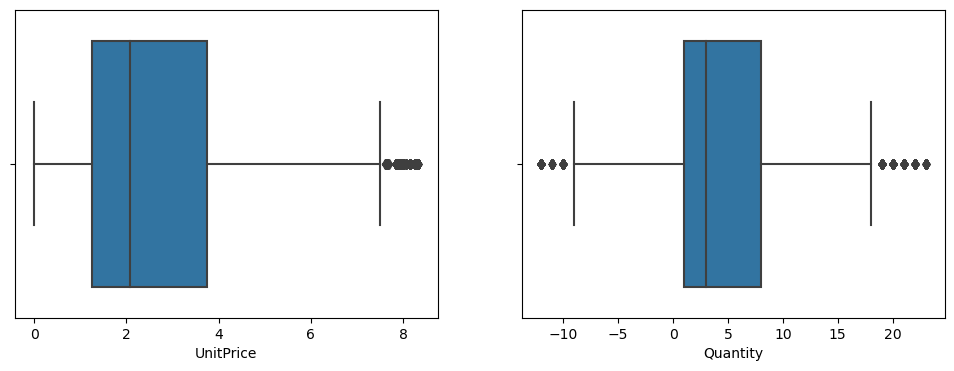

In [33]:
fig, axs = plt.subplots(1,2, figsize=(12,4))


sns.boxplot(x=df1_no_outliers['UnitPrice'],ax=axs[0])
sns.boxplot(x=df1_no_outliers['Quantity'], ax=axs[1])

plt.show()

In [34]:
#4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data



In [35]:
#5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

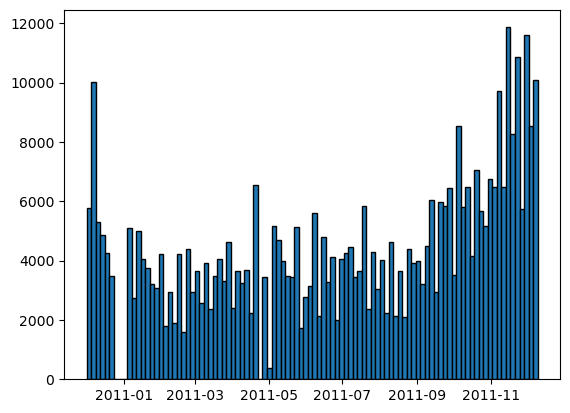

In [36]:
plt.hist(data=df1_no_outliers, x='InvoiceDate', bins=100, edgecolor='black')
plt.show()

In [37]:
df1_no_outliers['InvoiceMonth'] = df1_no_outliers['InvoiceDate'].dt.strftime('%B %Y')

df1_no_outliers['InvoiceDay'] = df1_no_outliers['InvoiceDate'].dt.day_name()

df1_no_outliers['InvoiceHour'] = df1_no_outliers['InvoiceDate'].dt.hour
df1_no_outliers.head()

/tmp/ipykernel_135/247611848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers['InvoiceMonth'] = df1_no_outliers['InvoiceDate'].dt.strftime('%B %Y')
/tmp/ipykernel_135/247611848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers['InvoiceDay'] = df1_no_outliers['InvoiceDate'].dt.day_name()
/tmp/ipykernel_135/247611848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceMonth,InvoiceDay,InvoiceHour
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,December 2010,Wednesday,8
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,December 2010,Wednesday,8
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,December 2010,Wednesday,8
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,December 2010,Wednesday,8
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,December 2010,Wednesday,8


In [38]:
df1_no_outliers['InvoiceDay'].value_counts()

InvoiceDay
Thursday     82317
Tuesday      81759
Monday       77559
Wednesday    75315
Friday       66038
Sunday       54662
Name: count, dtype: int64

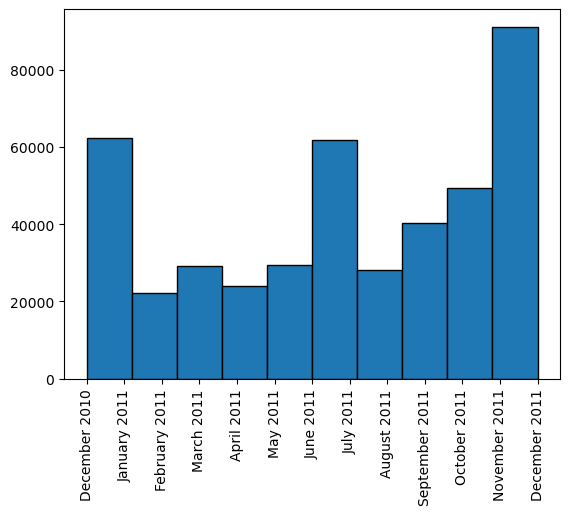

In [39]:
plt.hist(data=df1_no_outliers, x='InvoiceMonth', edgecolor='black')
plt.xticks(rotation=90)
plt.show()

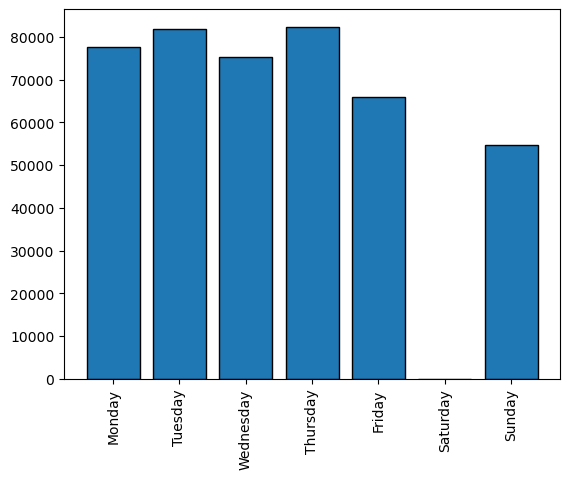

In [40]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = [77559, 81759, 75315, 82317, 66038, 0, 54662]

plt.bar(x=days, height=counts, edgecolor='black')
plt.xticks(rotation=90)
plt.show()

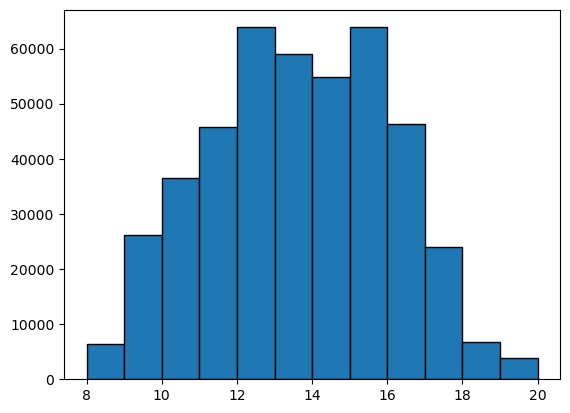

In [41]:
plt.hist(data=df1_no_outliers, x='InvoiceHour', bins=12, range=(8,20), edgecolor='black')
plt.show()

In [42]:
# 6. Explore the top-selling products and countries based on the quantity sold.

In [43]:
df1_sales = df1_no_outliers.groupby('Description')['Quantity'].sum().reset_index()


Top Ten Best Selling Products:                               Description  Quantity
1714             JUMBO BAG RED RETROSPOT     13908
206        ASSORTED COLOUR BIRD ORNAMENT     10875
3635  WHITE HANGING HEART T-LIGHT HOLDER     10796
1880             LUNCH BAG RED RETROSPOT     10329
1872             LUNCH BAG  BLACK SKULL.      8098
1875                 LUNCH BAG CARS BLUE      7838
1680              JAM MAKING SET PRINTED      7568
1712             JUMBO BAG PINK POLKADOT      7355
1874              LUNCH BAG APPLE DESIGN      7348
1882          LUNCH BAG SPACEBOY DESIGN       7203


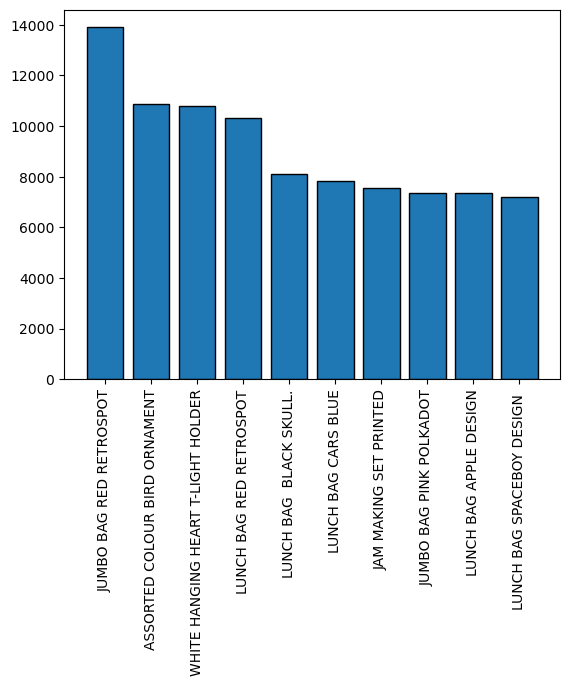

In [44]:
df1_top_products = df1_sales.sort_values('Quantity', ascending=False).head(10)
print('Top Ten Best Selling Products: ', df1_top_products)

plt.bar(x='Description', height='Quantity', data=df1_top_products, edgecolor='black')
plt.xticks(rotation=90)
plt.show()

In [45]:
df1_country_sales = df1_no_outliers.groupby("Country")["Quantity"].sum().reset_index()


Top 10 selling countries by quantity:
           Country  Quantity
36  United Kingdom   1863469
14         Germany     59382
13          France     53975
10            EIRE     44592
3          Belgium     13282
31           Spain     12873
33     Switzerland     11774
27        Portugal      9494
25          Norway      5741
19           Italy      4942


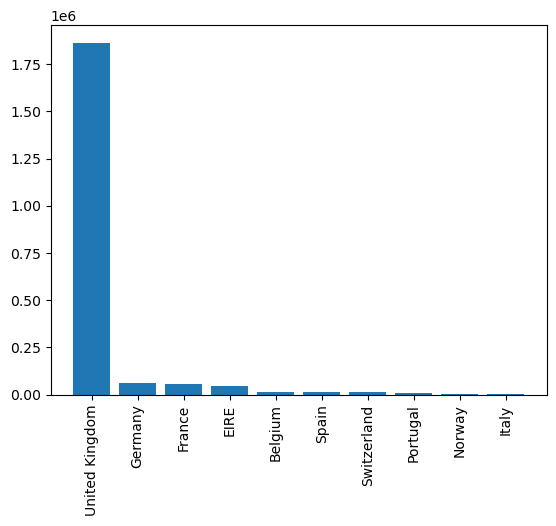

In [46]:
df1_top_countries = df1_country_sales.sort_values("Quantity", ascending=False).head(10) 
print("\nTop 10 selling countries by quantity:")
print(df1_top_countries)

plt.bar(x='Country', height='Quantity', data=df1_top_countries)
plt.xticks(rotation=90)
plt.show()

In [47]:
#7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

In [48]:
#High unit prices that consist of fees and debt adjustments, etc.

df[df['UnitPrice']> 10000].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom


In [49]:
#negative quantity sales

print(df[df['Quantity'] < 0].shape)

(10624, 8)


In [50]:
#negative unit price consisting of debt adjustments

print(df[df['UnitPrice'] < 0].head()

df[df['StockCode'] == 'B'].head()

SyntaxError: '(' was never closed (1337261951.py, line 3)

In [ ]:
print('Unique Descriptions: ', df['Description'].nunique())

print('Unique Stock Codes: ', df['StockCode'].nunique())

print('Unique Invoice Numbers: ', df['InvoiceNo'].nunique())

print('Unique Invoice Dates: ', df['InvoiceDate'].nunique())



#discrepancy between stock code and description

print(df[df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']['StockCode'].value_counts())



df['Description'].value_counts(), df['StockCode'].value_counts()

In [ ]:
#8. Draw conclusions and summarize your findings from the exploratory data analysis.